In [437]:
#import necessary library
import pandas as pd
import requests
import csv
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup #For data scrapping

# Data Exploration

In [438]:
#importing necessary library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [439]:
df = pd.read_csv("covid_update.csv")

In [440]:
df.head(10)

#          Country,Other  TotalCases NewCases TotalDeaths NewDeaths  \
0  NaN  \r\nNorth America\r\n   3,249,522  +10,032     171,323      +894   
1  NaN  \r\nSouth America\r\n   2,303,508   +4,608      87,179      +190   
2  NaN         \r\nEurope\r\n   2,467,078  +10,355     192,369      +247   
3  NaN           \r\nAsia\r\n   2,396,454  +28,068      58,501      +567   
4  NaN         \r\nAfrica\r\n     422,343     +961      10,451        +8   
5  NaN        \r\nOceania\r\n       9,643      +83         126       NaN   
6  NaN               \r\n\r\n         721      NaN          15       NaN   
7  NaN                  World  10,849,269  +54,107     519,964    +1,906   
8  1.0                    USA   2,782,346   +2,393    130,851        +53   
9  2.0                 Brazil   1,456,969   +3,600     60,813       +100   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0      1,422,418       +4,219   1,655,781           19,003              NaN   
1      1,450,628      +90,851     765,701           12,892              NaN   
2      1,396,762       +9,839     877,947            5,657              NaN   
3      1,586,382      +26,564     751,571           19,506              NaN   
4        201,701         +706     210,191              916              NaN   
5          8,687          +56         830                6              NaN   
6            651          NaN          55                4              NaN   
7      6,067,229     +132,235   4,262,076           57,984            1,392   
8      1,165,179         +499   1,486,316           15,898            8,406   
9        916,147      +89,281     480,009            8,318            6,854   

  Deaths/1M pop  TotalTests Tests/\r\n1M pop\r\n    Population  \
0           NaN         NaN                  NaN           NaN   
1           NaN         NaN                  NaN           NaN   
2           NaN         NaN                  NaN           NaN   
3           NaN         NaN                  NaN           NaN   
4           NaN         NaN                  NaN           NaN   
5           NaN         NaN                  NaN           NaN   
6           NaN         NaN                  NaN           NaN   
7          66.7         NaN                  NaN           NaN   
8           395  34,892,789              105,414  331,007,570    
9           286   3,227,591               15,184  212,562,300    

           Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  
0      North America              \r\n                NaN               NaN  
1      South America              \r\n                NaN               NaN  
2             Europe              \r\n                NaN               NaN  
3               Asia              \r\n                NaN               NaN  
4             Africa              \r\n                NaN               NaN  
5  Australia/Oceania              \r\n                NaN               NaN  
6                NaN              \r\n                NaN               NaN  
7                All              \r\n                NaN               NaN  
8      North America               119              2,530                 9  
9      South America               146              3,495                66

At first we need to name our features in a meaningful and authentic way. 

In [441]:
df.columns = ['#','Country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','SeriousCritical','TotalCasesPerMillion','DeathsPerMillion','TotalTests','TestsPerMillion','Population','Continent','CaseEvery','DeathEvery','TestEvery']
df.head()

#                Country TotalCases NewCases TotalDeaths NewDeaths  \
0 NaN  \r\nNorth America\r\n  3,249,522  +10,032     171,323      +894   
1 NaN  \r\nSouth America\r\n  2,303,508   +4,608      87,179      +190   
2 NaN         \r\nEurope\r\n  2,467,078  +10,355     192,369      +247   
3 NaN           \r\nAsia\r\n  2,396,454  +28,068      58,501      +567   
4 NaN         \r\nAfrica\r\n    422,343     +961      10,451        +8   

  TotalRecovered NewRecovered ActiveCases SeriousCritical  \
0      1,422,418       +4,219   1,655,781          19,003   
1      1,450,628      +90,851     765,701          12,892   
2      1,396,762       +9,839     877,947           5,657   
3      1,586,382      +26,564     751,571          19,506   
4        201,701         +706     210,191             916   

  TotalCasesPerMillion DeathsPerMillion TotalTests TestsPerMillion Population  \
0                  NaN              NaN        NaN             NaN        NaN   
1                  NaN              NaN        NaN             NaN        NaN   
2                  NaN              NaN        NaN             NaN        NaN   
3                  NaN              NaN        NaN             NaN        NaN   
4                  NaN              NaN        NaN             NaN        NaN   

       Continent CaseEvery DeathEvery TestEvery  
0  North America      \r\n        NaN       NaN  
1  South America      \r\n        NaN       NaN  
2         Europe      \r\n        NaN       NaN  
3           Asia      \r\n        NaN       NaN  
4         Africa      \r\n        NaN       NaN

We've seen some columns are not that much rellivent. We'll reduce those columns

In [442]:
df = df.drop(['#','CaseEvery','DeathEvery','TestEvery'], axis=1)
df.head(10)

Country  TotalCases NewCases TotalDeaths NewDeaths  \
0  \r\nNorth America\r\n   3,249,522  +10,032     171,323      +894   
1  \r\nSouth America\r\n   2,303,508   +4,608      87,179      +190   
2         \r\nEurope\r\n   2,467,078  +10,355     192,369      +247   
3           \r\nAsia\r\n   2,396,454  +28,068      58,501      +567   
4         \r\nAfrica\r\n     422,343     +961      10,451        +8   
5        \r\nOceania\r\n       9,643      +83         126       NaN   
6               \r\n\r\n         721      NaN          15       NaN   
7                  World  10,849,269  +54,107     519,964    +1,906   
8                    USA   2,782,346   +2,393    130,851        +53   
9                 Brazil   1,456,969   +3,600     60,813       +100   

  TotalRecovered NewRecovered ActiveCases SeriousCritical  \
0      1,422,418       +4,219   1,655,781          19,003   
1      1,450,628      +90,851     765,701          12,892   
2      1,396,762       +9,839     877,947           5,657   
3      1,586,382      +26,564     751,571          19,506   
4        201,701         +706     210,191             916   
5          8,687          +56         830               6   
6            651          NaN          55               4   
7      6,067,229     +132,235   4,262,076          57,984   
8      1,165,179         +499   1,486,316          15,898   
9        916,147      +89,281     480,009           8,318   

  TotalCasesPerMillion DeathsPerMillion  TotalTests TestsPerMillion  \
0                  NaN              NaN         NaN             NaN   
1                  NaN              NaN         NaN             NaN   
2                  NaN              NaN         NaN             NaN   
3                  NaN              NaN         NaN             NaN   
4                  NaN              NaN         NaN             NaN   
5                  NaN              NaN         NaN             NaN   
6                  NaN              NaN         NaN             NaN   
7                1,392             66.7         NaN             NaN   
8                8,406              395  34,892,789         105,414   
9                6,854              286   3,227,591          15,184   

     Population          Continent  
0           NaN      North America  
1           NaN      South America  
2           NaN             Europe  
3           NaN               Asia  
4           NaN             Africa  
5           NaN  Australia/Oceania  
6           NaN                NaN  
7           NaN                All  
8  331,007,570       North America  
9  212,562,300       South America

The First 8 Rows data is continantal data. We will deal with only countries data. So We're going to delete first 8 row from this dataset. 

In [443]:
df = df.iloc[8:]
df.head()


Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
8      USA  2,782,346   +2,393    130,851        +53      1,165,179   
9   Brazil  1,456,969   +3,600     60,813       +100        916,147   
10  Russia    661,165   +6,760      9,683       +147        428,978   
11   India    607,344   +2,124     17,873        +25        361,108   
12      UK    313,483      NaN     43,906        NaN            NaN   

   NewRecovered ActiveCases SeriousCritical TotalCasesPerMillion  \
8          +499   1,486,316          15,898                8,406   
9       +89,281     480,009           8,318                6,854   
10       +6,047     222,504           2,300                4,531   
11       +1,212     228,363           8,944                  440   
12          NaN         NaN             238                4,618   

   DeathsPerMillion  TotalTests TestsPerMillion      Population      Continent  
8               395  34,892,789         105,414    331,007,570   North America  
9               286   3,227,591          15,184    212,562,300   South America  
10               66  20,168,904         138,205    145,934,790          Europe  
11               13   9,056,173           6,562  1,380,011,546            Asia  
12              647   9,662,051         142,325     67,887,024          Europe

We can see the index start from 8. So we're going to reset the index number.

In [444]:
df = df.reset_index(drop=True)
df.head()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0     USA  2,782,346   +2,393    130,851        +53      1,165,179   
1  Brazil  1,456,969   +3,600     60,813       +100        916,147   
2  Russia    661,165   +6,760      9,683       +147        428,978   
3   India    607,344   +2,124     17,873        +25        361,108   
4      UK    313,483      NaN     43,906        NaN            NaN   

  NewRecovered ActiveCases SeriousCritical TotalCasesPerMillion  \
0         +499   1,486,316          15,898                8,406   
1      +89,281     480,009           8,318                6,854   
2       +6,047     222,504           2,300                4,531   
3       +1,212     228,363           8,944                  440   
4          NaN         NaN             238                4,618   

  DeathsPerMillion  TotalTests TestsPerMillion      Population      Continent  
0              395  34,892,789         105,414    331,007,570   North America  
1              286   3,227,591          15,184    212,562,300   South America  
2               66  20,168,904         138,205    145,934,790          Europe  
3               13   9,056,173           6,562  1,380,011,546            Asia  
4              647   9,662,051         142,325     67,887,024          Europe

In [445]:
#Data discription
df.describe()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
count      223        223       88         223        52            218   
unique     216        215       71         142        30            203   
top     Total:        141       +5                    +1             19   
freq         8          2        5          30         9              3   

       NewRecovered ActiveCases SeriousCritical TotalCasesPerMillion  \
count            79         219             138                  214   
unique           67         177              77                  200   
top             +23           0               1                   20   
freq              4          25              23                    3   

       DeathsPerMillion TotalTests TestsPerMillion Population Continent  
count               184        192             192        215       220  
unique               97        192             192        214         7  
top                   3    133,449          48,567               Africa  
freq                 11          1               1          2        58

From this Description We got some interesting instinct. <br>
### 1: Tatal affected countries = 215 
### 2: Most affectected Continent = Africa
### 3: Total affect countries in Africa = 58

In [446]:
df.shape

(223, 15)

Total number of rows are 223

In [447]:
df.tail(10)

Country  TotalCases NewCases TotalDeaths NewDeaths  \
213  Saint Pierre Miquelon           1      NaN                   NaN   
214                  China      83,537       +3      4,634        NaN   
215                 Total:   3,249,522  +10,032     171,323      +894   
216                 Total:   2,303,508   +4,608      87,179      +190   
217                 Total:   2,467,078  +10,355     192,369      +247   
218                 Total:   2,396,454  +28,068      58,501      +567   
219                 Total:     422,343     +961      10,451        +8   
220                 Total:       9,643      +83         126       NaN   
221                 Total:         721      NaN          15       NaN   
222                 Total:  10,849,269  +54,107     519,964    +1,906   

    TotalRecovered NewRecovered ActiveCases SeriousCritical  \
213              1          NaN           0             NaN   
214         78,487           +8         416               7   
215      1,422,418       +4,219   1,655,781          19,003   
216      1,450,628      +90,851     765,701          12,892   
217      1,396,762       +9,839     877,947           5,657   
218      1,586,382      +26,564     751,571          19,506   
219        201,701         +706     210,191             916   
220          8,687          NaN         830               6   
221            651          NaN          55               4   
222      6,067,229     +132,235   4,262,076          57,984   

    TotalCasesPerMillion DeathsPerMillion  TotalTests TestsPerMillion  \
213                  173              NaN         NaN             NaN   
214                   58                3  90,410,000          62,814   
215                  NaN              NaN         NaN             NaN   
216                  NaN              NaN         NaN             NaN   
217                  NaN              NaN         NaN             NaN   
218                  NaN              NaN         NaN             NaN   
219                  NaN              NaN         NaN             NaN   
220                  NaN              NaN         NaN             NaN   
221                  NaN              NaN         NaN             NaN   
222              1,391.9             66.7         NaN             NaN   

         Population          Continent  
213          5,794       North America  
214  1,439,323,776                Asia  
215             NaN      North America  
216             NaN      South America  
217             NaN             Europe  
218             NaN               Asia  
219             NaN             Africa  
220             NaN  Australia/Oceania  
221             NaN                NaN  
222             NaN                All

In [448]:
df = df.drop(df.index[215:222])
df = df.reset_index(drop=True)
df.tail()

Country  TotalCases NewCases TotalDeaths NewDeaths  \
211              St. Barth           6      NaN                   NaN   
212               Anguilla           3      NaN                   NaN   
213  Saint Pierre Miquelon           1      NaN                   NaN   
214                  China      83,537       +3      4,634        NaN   
215                 Total:  10,849,269  +54,107     519,964    +1,906   

    TotalRecovered NewRecovered ActiveCases SeriousCritical  \
211              6          NaN           0             NaN   
212              3          NaN           0             NaN   
213              1          NaN           0             NaN   
214         78,487           +8         416               7   
215      6,067,229     +132,235   4,262,076          57,984   

    TotalCasesPerMillion DeathsPerMillion  TotalTests TestsPerMillion  \
211                  607              NaN         152          15,389   
212                  200              NaN         272          18,130   
213                  173              NaN         NaN             NaN   
214                   58                3  90,410,000          62,814   
215              1,391.9             66.7         NaN             NaN   

         Population      Continent  
211          9,877   North America  
212         15,003   North America  
213          5,794   North America  
214  1,439,323,776            Asia  
215             NaN            All

Deleted unnecessary rows.

In [449]:
df.replace(np.NaN, 'f', regex=True)
df.tail()

Country  TotalCases NewCases TotalDeaths NewDeaths  \
211              St. Barth           6      NaN                   NaN   
212               Anguilla           3      NaN                   NaN   
213  Saint Pierre Miquelon           1      NaN                   NaN   
214                  China      83,537       +3      4,634        NaN   
215                 Total:  10,849,269  +54,107     519,964    +1,906   

    TotalRecovered NewRecovered ActiveCases SeriousCritical  \
211              6          NaN           0             NaN   
212              3          NaN           0             NaN   
213              1          NaN           0             NaN   
214         78,487           +8         416               7   
215      6,067,229     +132,235   4,262,076          57,984   

    TotalCasesPerMillion DeathsPerMillion  TotalTests TestsPerMillion  \
211                  607              NaN         152          15,389   
212                  200              NaN         272          18,130   
213                  173              NaN         NaN             NaN   
214                   58                3  90,410,000          62,814   
215              1,391.9             66.7         NaN             NaN   

         Population      Continent  
211          9,877   North America  
212         15,003   North America  
213          5,794   North America  
214  1,439,323,776            Asia  
215             NaN            All

In [450]:
df.columns

Index(['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical',
       'TotalCasesPerMillion', 'DeathsPerMillion', 'TotalTests',
       'TestsPerMillion', 'Population', 'Continent'],
      dtype='object')

In [451]:
df.dtypes

Country                 object
TotalCases              object
NewCases                object
TotalDeaths             object
NewDeaths               object
TotalRecovered          object
NewRecovered            object
ActiveCases             object
SeriousCritical         object
TotalCasesPerMillion    object
DeathsPerMillion        object
TotalTests              object
TestsPerMillion         object
Population              object
Continent               object
dtype: object

In [452]:
df.isna().sum()

Country                   0
TotalCases                0
NewCases                134
TotalDeaths               0
NewDeaths               169
TotalRecovered            5
NewRecovered            142
ActiveCases               4
SeriousCritical          85
TotalCasesPerMillion      2
DeathsPerMillion         32
TotalTests               24
TestsPerMillion          24
Population                1
Continent                 2
dtype: int64

A lot of Null values are present here

In [453]:
df.head(5)

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0     USA  2,782,346   +2,393    130,851        +53      1,165,179   
1  Brazil  1,456,969   +3,600     60,813       +100        916,147   
2  Russia    661,165   +6,760      9,683       +147        428,978   
3   India    607,344   +2,124     17,873        +25        361,108   
4      UK    313,483      NaN     43,906        NaN            NaN   

  NewRecovered ActiveCases SeriousCritical TotalCasesPerMillion  \
0         +499   1,486,316          15,898                8,406   
1      +89,281     480,009           8,318                6,854   
2       +6,047     222,504           2,300                4,531   
3       +1,212     228,363           8,944                  440   
4          NaN         NaN             238                4,618   

  DeathsPerMillion  TotalTests TestsPerMillion      Population      Continent  
0              395  34,892,789         105,414    331,007,570   North America  
1              286   3,227,591          15,184    212,562,300   South America  
2               66  20,168,904         138,205    145,934,790          Europe  
3               13   9,056,173           6,562  1,380,011,546            Asia  
4              647   9,662,051         142,325     67,887,024          Europe

In [454]:
cols = []
for col in df.columns:
    cols.append(col)
cols.remove('Country')
cols.remove('Continent')
cols

['TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'SeriousCritical',
 'TotalCasesPerMillion',
 'DeathsPerMillion',
 'TotalTests',
 'TestsPerMillion',
 'Population']

In [455]:
# for col in cols:
#         for index, row in df.iterrows():
#         product = row['product']
#             value = row[col]
#             category = row['Continent']
#         if np.isnan(value):
#             category_mean = df.groupby('Continent')[col].mean()[category]
#             print(category_mean,col)
#             print(f'category_mean : {category_mean}')
#             df.loc[index, 'value'] = category_mean
#             df[col].fillna(category_mean,inplace=True)
#           else:
#             print(product, value, category)
#df[col].fillna(df.groupby('Continent')[col].mean()['Continent'],inplace=True)
#print(col, "-->", df.groupby('Continent')[col].mean())

Categorized the numerical columns to fill the null values of those columns by their mean of their continent.

In [456]:
for col in cols:
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('+','')
    df[col] = df[col].str.replace(" ",'')
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].fillna(df.groupby('Continent')[col].transform('mean'))

df.isna().sum()

Country                 0
TotalCases              0
NewCases                2
TotalDeaths             0
NewDeaths               8
TotalRecovered          1
NewRecovered            2
ActiveCases             0
SeriousCritical         1
TotalCasesPerMillion    2
DeathsPerMillion        2
TotalTests              3
TestsPerMillion         3
Population              3
Continent               2
dtype: int64

Still we have some null values as the some of the contitnents such as Australia or NaN hasn't updated the data of that day. So it couldn't find the data to measure the mean of that continent.

In [476]:
df.tail(20)

Country  TotalCases      NewCases    TotalDeaths  \
196           New Caledonia          21     41.500000      63.000000   
197                    Laos          19    877.125000    1392.880952   
198             Saint Lucia          19   1254.000000    5907.689655   
199                Dominica          18   1254.000000    5907.689655   
200                    Fiji          18     41.500000      63.000000   
201   Saint Kitts and Nevis          15   1254.000000    5907.689655   
202        Falkland Islands          13   2304.000000    6706.076923   
203               Greenland          13   1254.000000    5907.689655   
204            Vatican City          12    414.200000    4274.866667   
205              Montserrat          11   1254.000000       1.000000   
206        Papua New Guinea          11     41.500000      63.000000   
207          Western Sahara          10     80.083333       1.000000   
208              MS Zaandam           9           NaN       2.000000   
209  British Virgin Islands           8   1254.000000       1.000000   
210   Caribbean Netherlands           7   1254.000000    5907.689655   
211               St. Barth           6   1254.000000    5907.689655   
212                Anguilla           3   1254.000000    5907.689655   
213   Saint Pierre Miquelon           1   1254.000000    5907.689655   
214                   China       83537      3.000000    4634.000000   
215                  Total:    10849269  54107.000000  519964.000000   

       NewDeaths  TotalRecovered   NewRecovered  ActiveCases  SeriousCritical  \
196          NaN            21.0      28.000000          0.0         3.000000   
197    28.350000            19.0     948.714286          0.0       557.314286   
198   149.000000            19.0     468.777778          0.0      1117.823529   
199   149.000000            18.0     468.777778          0.0      1117.823529   
200          NaN            18.0      28.000000          0.0         3.000000   
201   149.000000            15.0     468.777778          0.0      1117.823529   
202    63.333333            13.0   30283.666667          0.0       991.692308   
203   149.000000            13.0     468.777778          0.0      1117.823529   
204    17.642857            12.0     468.523810          0.0       166.382353   
205   149.000000            10.0     468.777778          0.0      1117.823529   
206          NaN             8.0      28.000000          3.0         3.000000   
207     2.666667             8.0      70.600000          1.0        32.714286   
208          NaN             NaN            NaN          7.0              NaN   
209   149.000000             7.0     468.777778          0.0      1117.823529   
210   149.000000             7.0     468.777778          0.0      1117.823529   
211   149.000000             6.0     468.777778          0.0      1117.823529   
212   149.000000             3.0     468.777778          0.0      1117.823529   
213   149.000000             1.0     468.777778          0.0      1117.823529   
214    28.350000         78487.0       8.000000        416.0         7.000000   
215  1906.000000       6067229.0  132235.000000    4262076.0     57984.000000   

     TotalCasesPerMillion  DeathsPerMillion    TotalTests  TestsPerMillion  \
196                  74.0          4.000000  8.406000e+03     29443.000000   
197                   3.0         23.042857  1.614700e+04      2219.000000   
198                 103.0         79.379310  1.667000e+03      9078.000000   
199                 250.0         79.379310  6.230000e+02      8654.000000   
200                  20.0          4.000000  4.000000e+03      4462.000000   
201                 282.0         79.379310  4.540000e+02      8534.000000   
202                3737.0        111.692308  1.197000e+03    344064.000000   
203                 229.0         79.379310  3.839000e+03     67624.000000   
204               14981.0        199.533333  1.328985e+06     98568.106383   
205                2204.0

In [457]:
df.groupby('Continent')['TotalCases','Country'].mean()

TotalCases
Continent                      
Africa             7.409526e+03
All                1.084927e+07
Asia               4.890722e+04
Australia/Oceania  1.607167e+03
Europe             5.139746e+04
North America      8.332108e+04
South America      1.645363e+05

Null values are fixed. But **Continent** column has 2 null values.

In [458]:
print(df[df["Continent"].isnull()]['Country'])

142    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


These are not under any Continent. Found out these are ships. 

In [459]:
df.dtypes

Country                  object
TotalCases                int64
NewCases                float64
TotalDeaths             float64
NewDeaths               float64
TotalRecovered          float64
NewRecovered            float64
ActiveCases             float64
SeriousCritical         float64
TotalCasesPerMillion    float64
DeathsPerMillion        float64
TotalTests              float64
TestsPerMillion         float64
Population              float64
Continent                object
dtype: object

After fixing the null values we have got the columns as desired data data type.

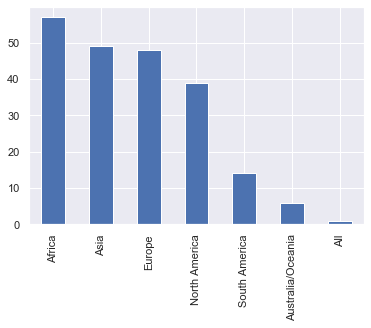

In [460]:
plot = df["Continent"].value_counts().plot(kind="bar")

**Africa** has the most countries infected with this virus.

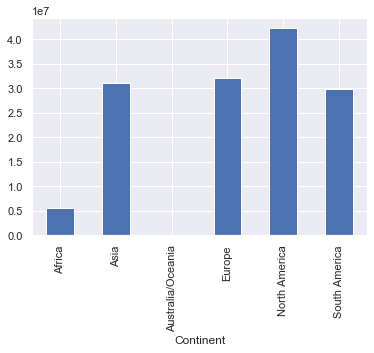

In [461]:
TCC = df.melt(['TotalCases','Continent']).groupby('Continent').TotalCases.sum().drop('All').plot(kind='bar')

But from here we can see that although countries of **Africa** are most infected but most cases are in **North America**. And **Australia** is in the safest pposition.

In [462]:
idx = df.groupby(['Continent'])['TotalCases'].transform(max) == df['TotalCases']
df[idx]

Country  TotalCases      NewCases  TotalDeaths    NewDeaths  \
0             USA     2782346   2393.000000     130851.0    53.000000   
1          Brazil     1456969   3600.000000      60813.0   100.000000   
2          Russia      661165   6760.000000       9683.0   147.000000   
3           India      607344   2124.000000      17873.0    25.000000   
16   South Africa      159333     80.083333       2749.0     2.666667   
70      Australia        8001     81.000000        104.0          NaN   
215        Total:    10849269  54107.000000     519964.0  1906.000000   

     TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0         1165179.0         499.0    1486316.0          15898.0   
1          916147.0       89281.0     480009.0           8318.0   
2          428978.0        6047.0     222504.0           2300.0   
3          361108.0        1212.0     228363.0           8944.0   
16          76025.0          70.6      80559.0            539.0   
70           7090.0          50.0        807.0              5.0   
215       6067229.0      132235.0    4262076.0          57984.0   

     TotalCasesPerMillion  DeathsPerMillion  TotalTests  TestsPerMillion  \
0                  8406.0             395.0  34892789.0         105414.0   
1                  6854.0             286.0   3227591.0          15184.0   
2                  4531.0              66.0  20168904.0         138205.0   
3                   440.0              13.0   9056173.0           6562.0   
16                 2687.0              46.0   1666939.0          28106.0   
70                  314.0               4.0   2561143.0         100438.0   
215                1391.9              66.7         NaN              NaN   

       Population          Continent  
0    3.310076e+08      North America  
1    2.125623e+08      South America  
2    1.459348e+08             Europe  
3    1.380012e+09               Asia  
16   5.930802e+07             Africa  
70   2.549977e+07  Australia/Oceania  
215           NaN                All

From here we can see which countries of the continents has the highest number of total infected cases. 

In [463]:
idx = df.groupby(['Continent'])['TotalDeaths'].transform(max) == df['TotalDeaths']
df[idx]

Country  TotalCases      NewCases  TotalDeaths    NewDeaths  \
0          USA     2782346   2393.000000     130851.0    53.000000   
1       Brazil     1456969   3600.000000      60813.0   100.000000   
3        India      607344   2124.000000      17873.0    25.000000   
4           UK      313483    414.200000      43906.0    17.642857   
21       Egypt       69814     80.083333       3034.0     2.666667   
70   Australia        8001     81.000000        104.0          NaN   
215     Total:    10849269  54107.000000     519964.0  1906.000000   

     TotalRecovered  NewRecovered   ActiveCases  SeriousCritical  \
0      1.165179e+06     499.00000  1.486316e+06          15898.0   
1      9.161470e+05   89281.00000  4.800090e+05           8318.0   
3      3.611080e+05    1212.00000  2.283630e+05           8944.0   
4      2.706620e+04     468.52381  9.938614e+03            238.0   
21     1.888100e+04      70.60000  4.789900e+04             41.0   
70     7.090000e+03      50.00000  8.070000e+02              5.0   
215    6.067229e+06  132235.00000  4.262076e+06          57984.0   

     TotalCasesPerMillion  DeathsPerMillion  TotalTests  TestsPerMillion  \
0                  8406.0             395.0  34892789.0         105414.0   
1                  6854.0             286.0   3227591.0          15184.0   
3                   440.0              13.0   9056173.0           6562.0   
4                  4618.0             647.0   9662051.0         142325.0   
21                  682.0              30.0    135000.0           1319.0   
70                  314.0               4.0   2561143.0         100438.0   
215                1391.9              66.7         NaN              NaN   

       Population          Continent  
0    3.310076e+08      North America  
1    2.125623e+08      South America  
3    1.380012e+09               Asia  
4    6.788702e+07             Europe  
21   1.023264e+08             Africa  
70   2.549977e+07  Australia/Oceania  
215           NaN                All